In [2]:
import os
import cv2
import numpy as np
from time import time
import matplotlib.pyplot as plt
import copy 
import random
#from skimage import io
import math

#File Upload
husk at filerne skal være samme størrelse

Refrence image

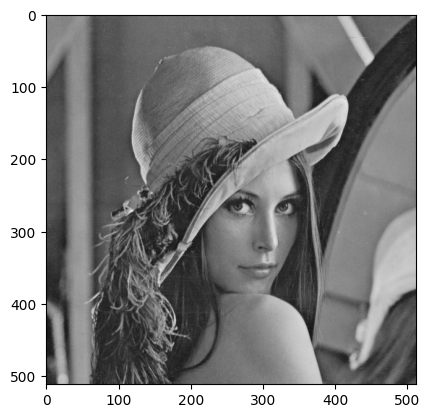

In [3]:
#read image
refIm = cv2.imread('Lenna_(test_image) 512x512.png')
refIm = cv2.cvtColor(refIm, cv2.COLOR_RGB2GRAY)
#show image
plt.imshow(cv2.cvtColor(refIm, cv2.COLOR_BGR2RGB))

16_stacked.jpg
17_stacked.jpg
18_stacked.jpg
19_stacked.jpg
20_stacked.jpg
21_stacked.jpg
22_stacked.jpg
23__stacked.jpg
24_stacked.jpg
25_stacked.jpg
26_stacked.jpg
27_stacked.jpg
28_stacked.jpg
29_stacked.jpg
30_stacked.jpg
31_stacked.jpg
33_stacked.jpg
34_stacked.jpg
35_stacked.jpg
36_stacked.jpg
37_stacked.jpg
38_stacked.jpg
39_stacked.jpg
40_stacked.jpg
41_stacked.jpg
42_stacked.jpg
43_stacked.jpg
44_stacked.jpg
45_stacked.jpg
46_stacked.jpg
47_stacked.jpg
48_stacked.jpg
49_stacked.jpg
50_stacked.jpg
51_stacked.jpg
52_stacked.jpg
53_stacked.jpg
54_stacked.jpg
55_stacked.jpg
56_stacked.jpg
57_stacked.jpg
58_stacked.jpg
59_stacked.jpg
60_stacked.jpg


In [14]:
#read image

#inputImage = "15_stacked.jpg"
#folderPath = os.getcwd()+"\\Photos for SNR tests\\"+inputImage
directory = os.getcwd()+"\\read folder\\"
for filename in os.listdir(directory):
    file = os.path.join(directory, filename)
    print(file)
    
    testIm = cv2.imread(file)
    filepaths = [];
    #print(refIm.shape)
    imHeight = refIm.shape[0]
    imWidth = refIm.shape[1]
    image = cv2.cvtColor(testIm, cv2.COLOR_RGB2GRAY)
    print(image.shape)
    for x in range(0,image.shape[1],imWidth):
        for y in range(0,image.shape[0],imHeight):
            s = os.getcwd()+"\\temp\\"+"image"+str(x)+"_"+str(y)+".png";
            i = image.copy()[y:y+imHeight, x:x+imWidth]
            #print(s," ",i.shape)
            if(i.shape[0]!= 0 and i.shape[1]!= 0):
                cv2.imwrite(s,i)
                filepaths.append(s);

            #filepaths.append(s);
            #show image
            #plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Functions
    def signaltonoise(a, axis=0, ddof=0):
        a = np.asanyarray(a)
        m = a.mean(axis)
        sd = a.std(axis=axis, ddof=ddof)
        return np.where(sd == 0, 0, m/sd)

    # SNR calculations
    psnrlist = []
    snrlist = []

    for x in range(len(filepaths)):
      image = cv2.imread(filepaths[x])
      image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
      if (image.shape[0] == refIm.shape[0] and image.shape[1] == refIm.shape[1]):
        p = cv2.PSNR(image, refIm,255)
        #print("PSNR: " + str(p));
        psnrlist.append(p)
        s = signaltonoise(image, axis=None)
        #print("SNR: "+str(s));
        snrlist.append(s)

    print(filename)
    if (len(psnrlist) > 1):
      print('PSNR avg: ' + str(sum(psnrlist) / len(psnrlist)))
    else:
      print('PSNR : ' + str(psnrlist[0]))
      
    if (len(snrlist) > 1):
      print('SNR avg: ' + str(sum(snrlist) / len(snrlist)))
    else:
      print('SNR : ' + str(snrlist[0]))

c:\Projects\P3-Project\PSNR og SNR\read folder\16_stacked.jpg
(3288, 5047)
16_stacked.jpg
PSNR avg: 10.207230704047975
SNR avg: 285.1934476988205
c:\Projects\P3-Project\PSNR og SNR\read folder\17_stacked.jpg
(3279, 5039)
17_stacked.jpg
PSNR avg: 10.207252190352161
SNR avg: 287.62765658696475
c:\Projects\P3-Project\PSNR og SNR\read folder\18_stacked.jpg
(3274, 5036)
18_stacked.jpg
PSNR avg: 10.206763408598032
SNR avg: 287.42509999955973
c:\Projects\P3-Project\PSNR og SNR\read folder\19_stacked.jpg
(3270, 5032)
19_stacked.jpg
PSNR avg: 10.208323375938061
SNR avg: 288.41075567636796
c:\Projects\P3-Project\PSNR og SNR\read folder\20_stacked.jpg
(3265, 5028)
20_stacked.jpg
PSNR avg: 10.2083567492327
SNR avg: 290.2080448088604
c:\Projects\P3-Project\PSNR og SNR\read folder\21_stacked.jpg
(3262, 5024)
21_stacked.jpg
PSNR avg: 10.208356651400766
SNR avg: 291.9741356613167
c:\Projects\P3-Project\PSNR og SNR\read folder\22_stacked.jpg
(3257, 5020)
22_stacked.jpg
PSNR avg: 10.208368091476993
SNR 

#Functioner


#Udrening

PSNR avg: 6.6075556950190615
SNR avg: 0.009192267312987298


C:\Users\User\AppData\Local\Temp\ipykernel_1016\3991552225.py:27: RuntimeWarning: invalid value encountered in double_scalars
  return np.where(sd == 0, 0, m/sd)


In [ ]:
)
print('PSNR avg: ' + str(sum(psnrlist) / len(psnrlist)))
print('SNR avg: ' + str(sum(snrlist) / len(snrlist)))

In [ ]:
)
print('PSNR avg: ' + str(sum(psnrlist) / len(psnrlist)))
print('SNR avg: ' + str(sum(snrlist) / len(snrlist)))